In [65]:
#Importando librerias 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
from datetime import datetime


#Tuneando la imagen de los resultados

sns.set(rc={'figure.figsize':(11.7,8.27)})


In [3]:
#Se navega hasta el documento

os.chdir('/Users/rodolfopardo/robo/')

In [18]:
#Se realiza la busqueda de archivos csv en carpeta

extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [19]:
#Todos los archivos csv a analizar para la exploración de los datos 

all_filenames

['dnrpa-robos-recuperos-autos-201909.csv',
 'dnrpa-robos-recuperos-autos-201908.csv',
 'dnrpa-robos-recuperos-autos-201911.csv',
 'dnrpa-robos-recuperos-autos-201905.csv',
 'dnrpa-robos-recuperos-autos-201904.csv',
 'dnrpa-robos-recuperos-autos-201910.csv',
 'dnrpa-robos-recuperos-autos-201906.csv',
 'dnrpa-robos-recuperos-autos-201912.csv',
 'dnrpa-robos-recuperos-autos-201907.csv',
 'dnrpa-robos-recuperos-autos-201903.csv',
 'dnrpa-robos-recuperos-autos-201902.csv',
 'dnrpa-robos-recuperos-autos-201901.csv']

In [20]:
#Se combinan todos en una lista 
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#Se exporta todo a csv
combined_csv.to_csv( "combined_csv.csv", index=False)

#Los warnings mostrados es por el orden que registra pandas en los archivos que esta juntando

/Users/rodolfopardo/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


In [4]:
#Se procede a leer el archivo 

data = pd.read_csv('combined_csv.csv')

/Users/rodolfopardo/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


#### Data exploration

In [5]:
print('Tenemos una base de datos con {} registros de robos de automóviles registrados en Argentina'.format(data.shape[0]))

Tenemos una base de datos con 36833 registros de robos de automóviles registrados en Argentina


In [6]:
print('Tenemos una base de datos con {} variables a analizar'.format(data.shape[1]))

Tenemos una base de datos con 27 variables a analizar


In [7]:
#Las 27 variables a analizar por cada dato

data.columns

Index(['automotor_anio_modelo', 'automotor_marca_codigo',
       'automotor_marca_descripcion', 'automotor_modelo_codigo',
       'automotor_modelo_descripcion', 'automotor_origen',
       'automotor_tipo_codigo', 'automotor_tipo_descripcion',
       'automotor_uso_codigo', 'automotor_uso_descripcion',
       'fecha_inscripcion_inicial', 'registro_seccional_codigo',
       'registro_seccional_descripcion', 'registro_seccional_provincia',
       'titular_anio_nacimiento', 'titular_domicilio_localidad',
       'titular_domicilio_provincia', 'titular_domicilio_provincia_id',
       'titular_domicilio_provincia_indec_id', 'titular_genero',
       'titular_pais_nacimiento', 'titular_pais_nacimiento_id',
       'titular_pais_nacimiento_indec_id', 'titular_porcentaje_titularidad',
       'titular_tipo_persona', 'tramite_fecha', 'tramite_tipo'],
      dtype='object')

In [10]:
#Valores nulos 

data.isnull().sum()

automotor_anio_modelo                     160
automotor_marca_codigo                    778
automotor_marca_descripcion                 0
automotor_modelo_codigo                   860
automotor_modelo_descripcion                0
automotor_origen                            0
automotor_tipo_codigo                    1576
automotor_tipo_descripcion                  0
automotor_uso_codigo                        1
automotor_uso_descripcion                   1
fecha_inscripcion_inicial                   1
registro_seccional_codigo                   0
registro_seccional_descripcion              0
registro_seccional_provincia                0
titular_anio_nacimiento                    11
titular_domicilio_localidad                52
titular_domicilio_provincia                 0
titular_domicilio_provincia_id           9220
titular_domicilio_provincia_indec_id    27613
titular_genero                              0
titular_pais_nacimiento                     0
titular_pais_nacimiento_id        

Podemos observar que columnas relacionadas al ID del INDEC tienen gran cantidad de valores perdidos, hablamos de casi el 85% de los datos nulos, por lo que <font color=red>se eliminan</font> porque no aportan datos diferenciales a la muestra. 
También, las columnas marca_codigo y modelo_codigo son reemplazadas por las descripciones correspondientes de marca y modelo en columnas separadas por lo cual se decide <font color=red>eliminar</font> de la muestra a estas dos columnas. 

#### Se eliminan columnas con más del 85% de datos perdidos

In [16]:
#Eliminando columnas 

data.drop(columns = ['titular_domicilio_provincia_indec_id', 'titular_pais_nacimiento_indec_id'],
         inplace = True)

In [28]:
#Se eliminan columnas con poco dato de interes 

data.drop(columns = ['automotor_marca_codigo', 'automotor_modelo_codigo'], inplace = True)

In [29]:
data.drop(columns = ['automotor_tipo_codigo'], inplace = True)

#### Completando las demas columnas con valores "sin registro" para que no sean considerados nulos en la muestra

In [36]:
#Completamos  

def relleno_nan(x):
    data[x].fillna('sin registro', inplace = True)
    return data[x]

def relleno_nan_num(x):
    data[x].fillna(0, inplace = True)
    return data[x]

relleno_nan('titular_pais_nacimiento_id')
relleno_nan_num('titular_domicilio_provincia_id')
relleno_nan('titular_domicilio_localidad')
relleno_nan_num('titular_anio_nacimiento')
relleno_nan_num('automotor_anio_modelo')
relleno_nan('automotor_uso_descripcion')
relleno_nan_num('fecha_inscripcion_inicial')

0        2001-07-30
1        2000-01-07
2        1991-05-31
3        1996-12-18
4        2002-04-22
            ...    
36828    2011-05-26
36829    2011-02-28
36830    2010-08-31
36831    2015-06-19
36832    2002-04-12
Name: fecha_inscripcion_inicial, Length: 36833, dtype: object

#### Chequeando la existencia de valores nulos en la muestra


In [37]:
data.isnull().sum()

automotor_anio_modelo             0
automotor_marca_descripcion       0
automotor_modelo_descripcion      0
automotor_origen                  0
automotor_tipo_descripcion        0
automotor_uso_codigo              0
automotor_uso_descripcion         0
fecha_inscripcion_inicial         0
registro_seccional_codigo         0
registro_seccional_descripcion    0
registro_seccional_provincia      0
titular_anio_nacimiento           0
titular_domicilio_localidad       0
titular_domicilio_provincia       0
titular_domicilio_provincia_id    0
titular_genero                    0
titular_pais_nacimiento           0
titular_pais_nacimiento_id        0
titular_porcentaje_titularidad    0
titular_tipo_persona              0
tramite_fecha                     0
tramite_tipo                      0
dtype: int64

<font color= green> Tenemos una base limpia, sin valores nulos y lista para trabajar

#### Tipos de datos de cada columna de nuestro dataset

In [39]:
data.dtypes

automotor_anio_modelo             float64
automotor_marca_descripcion        object
automotor_modelo_descripcion       object
automotor_origen                   object
automotor_tipo_descripcion         object
automotor_uso_codigo              float64
automotor_uso_descripcion          object
fecha_inscripcion_inicial          object
registro_seccional_codigo           int64
registro_seccional_descripcion     object
registro_seccional_provincia       object
titular_anio_nacimiento           float64
titular_domicilio_localidad        object
titular_domicilio_provincia        object
titular_domicilio_provincia_id     object
titular_genero                     object
titular_pais_nacimiento            object
titular_pais_nacimiento_id         object
titular_porcentaje_titularidad      int64
titular_tipo_persona               object
tramite_fecha                      object
tramite_tipo                       object
dtype: object

In [42]:
data.fecha_inscripcion_inicial.head()

0    2001-07-30
1    2000-01-07
2    1991-05-31
3    1996-12-18
4    2002-04-22
Name: fecha_inscripcion_inicial, dtype: object

Se observa que la columna fecha es una variable de tipo object cuando debería ser de tipo date para realizar cualquier tipo de estudio de time series.<br> <font color=green>Se procede a cambiar </font> el tipo:

In [53]:
data['tramite_fecha'] = pd.to_datetime(data['tramite_fecha'])

##### Chequeamos que efectivamente se cambie el tipo de variable por datetime

In [54]:
data.dtypes

automotor_anio_modelo                    float64
automotor_marca_descripcion               object
automotor_modelo_descripcion              object
automotor_origen                          object
automotor_tipo_descripcion                object
automotor_uso_codigo                     float64
automotor_uso_descripcion                 object
fecha_inscripcion_inicial         datetime64[ns]
registro_seccional_codigo                  int64
registro_seccional_descripcion            object
registro_seccional_provincia              object
titular_anio_nacimiento                  float64
titular_domicilio_localidad               object
titular_domicilio_provincia               object
titular_domicilio_provincia_id            object
titular_genero                            object
titular_pais_nacimiento                   object
titular_pais_nacimiento_id                object
titular_porcentaje_titularidad             int64
titular_tipo_persona                      object
tramite_fecha       

### Data Exploration

In [55]:
data.head()

,automotor_anio_modelo,automotor_marca_descripcion,automotor_modelo_descripcion,automotor_origen,automotor_tipo_descripcion,automotor_uso_codigo,automotor_uso_descripcion,fecha_inscripcion_inicial,registro_seccional_codigo,registro_seccional_descripcion,...,titular_domicilio_localidad,titular_domicilio_provincia,titular_domicilio_provincia_id,titular_genero,titular_pais_nacimiento,titular_pais_nacimiento_id,titular_porcentaje_titularidad,titular_tipo_persona,tramite_fecha,tramite_tipo
0,2001.0,PEUGEOT,PARPADDAA,Nacional,RURAL 3 PUERTAS,1.0,Privado,2001-07-30,1011,BARADERO,...,BARADERO,BUENOS AIRES,6,No identificado,ARGENTINA,ARG,100,Física,2019-09-04,DENUNCIA DE ROBO O HURTO
1,2000.0,PEUGEOT,PARTNER 1.9D,Nacional,FURGON VIDRIADO C/AS,1.0,Privado,2000-01-07,1045,LA PLATA Nº 03,...,LA PLATA,BUENOS AIRES,6,Masculino,ARGENTINA,ARG,50,Física,2019-09-16,DENUNCIA DE ROBO O HURTO
2,1991.0,RENAULT,RENAULT 9 TS,Nacional,BERLINA 4 PTAS,1.0,Privado,1991-05-31,1106,LA MATANZA Nº 02,...,RAMOS MEJIA-LA MATANZA,BUENOS AIRES,6,No identificado,PARAGUAY,PRY,100,Física,2019-09-02,DENUNCIA DE ROBO O HURTO
3,1996.0,MERCEDES BENZ,SPRINTER 310D/C3000,Nacional,COMBI 3000,1.0,Privado,1996-12-18,1113,SAN VICENTE,...,GUERNICA,BUENOS AIRES,6,Masculino,BOLIVIA,BOL,100,Física,2019-09-20,DENUNCIA DE ROBO O HURTO
4,2002.0,RENAULT,KANGOO RL EXPRESS DIE DA AA,Nacional,FURGON VIDRIADO C/AS,1.0,Privado,2002-04-22,1118,QUILMES Nº 2,...,BERNAL,BUENOS AIRES,6,Femenino,ARGENTINA,ARG,100,Física,2019-09-13,DENUNCIA DE ROBO O HURTO


Se observa que los id son reemplazables por columnas object que describen en detalle los datos que realmente nos interesan para la nota por lo que se procede a limpiar

In [57]:
data.drop(columns = ['registro_seccional_codigo', 'automotor_uso_codigo', 'titular_domicilio_provincia_id',
                    'titular_pais_nacimiento_id'], inplace = True)

In [143]:
data.to_csv('data_clean.csv')

Ahora, que ya tenemos toda nuestra base limpia, procedemos a investigar cada una de nuestras variables que nos arrojará los primeros datos de la muestra a estudiar. Por cada una de las preguntas, responderemos con "agrupaciones" y "visualizaciones de datos"

### Top 10 de modelos de autos (año) más robados en Argentina

In [63]:
data['automotor_anio_modelo'].astype(int).value_counts().head(10)

2011    2061
2013    1931
2012    1890
2008    1852
2007    1843
2010    1749
1999    1749
1998    1686
2006    1662
1997    1450
Name: automotor_anio_modelo, dtype: int64

Los modelos 2011, son los autos más robados de Argentina, seguidos de modelos 2013 y 2012.
<br>Llama la atención que los auos nuevos no son buscados por los delincuentes.

[]

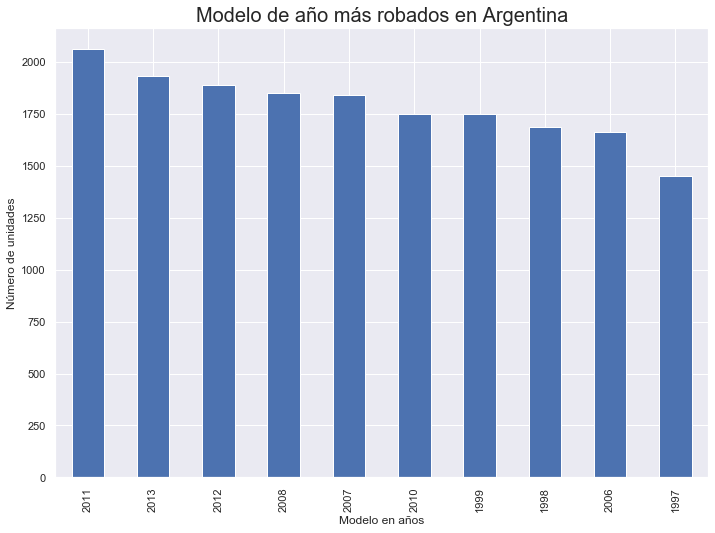

In [138]:
data['automotor_anio_modelo'].astype(int).value_counts().head(10).plot.bar()
plt.title('Modelo de año más robados en Argentina', fontsize = 20)
plt.xlabel('Modelo en años')
plt.ylabel('Número de unidades')
plt.plot()

### TOP Marca de autos más robadas en Argentina

In [83]:
data['automotor_marca_descripcion'].value_counts(normalize = True).head(10)

VOLKSWAGEN       0.176146
RENAULT          0.155133
FIAT             0.138707
CHEVROLET        0.127847
FORD             0.123639
PEUGEOT          0.120734
TOYOTA           0.035349
CITROEN          0.032661
MERCEDES BENZ    0.014606
HONDA            0.010697
Name: automotor_marca_descripcion, dtype: float64

In [139]:
data['automotor_marca_descripcion'].value_counts().head(10)

VOLKSWAGEN       6488
RENAULT          5714
FIAT             5109
CHEVROLET        4709
FORD             4554
PEUGEOT          4447
TOYOTA           1302
CITROEN          1203
MERCEDES BENZ     538
HONDA             394
Name: automotor_marca_descripcion, dtype: int64

<font color = blue>Volkswagen lidera el ranking con 6488 unidades robadas. Representa el 17% de los robos totales. 
Renault lo sigue con 5714 unidades robadas. Representa el 15% de los robos totales.

[]

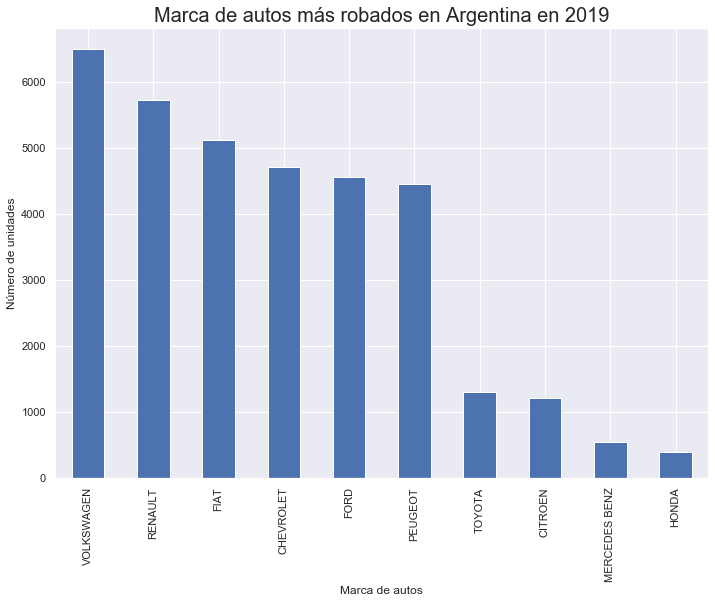

In [87]:
data['automotor_marca_descripcion'].value_counts().head(10).plot.bar()
plt.title('Marca de autos más robados en Argentina en 2019', fontsize = 20)
plt.xlabel('Marca de autos')
plt.ylabel('Número de unidades')
plt.plot()

### Top 10 modelo de auto más robado en Argentina

In [82]:
data['automotor_modelo_descripcion'].value_counts().head(20)

GOL 1.6                           618
GOL TREND 1.6                     362
RENAULT 9 RL                      298
FOX 1.6                           288
FIORINO FIRE 1242 MPI 8V          237
CORSA CLASSIC 4P SUPER 1.6N       236
UNO FIRE 1242 MPI 8V              222
KA                                212
GOL GL                            207
CORSA GL 1.6 MPFI                 195
VOYAGE 1.6                        185
CLASSIC 4 P LS ABS+AIRBAG 1.4N    170
SPAZIO TR                         165
ECOSPORT 1.6 L 4X2 XLS            162
GOL GL 1.6 MI                     160
RENAULT 9 GTL                     148
BORA 2.0                          145
GOL 1.4 L                         129
GOL TREND 1.6 MSI                 128
VIVACE                            127
Name: automotor_modelo_descripcion, dtype: int64

[]

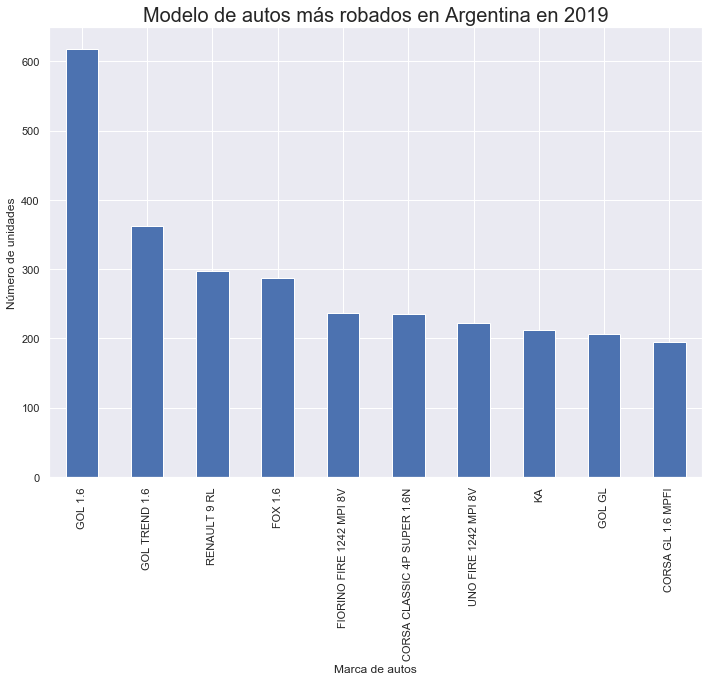

In [86]:
data['automotor_modelo_descripcion'].value_counts().head(10).plot.bar()
plt.title('Modelo de autos más robados en Argentina en 2019', fontsize = 20)
plt.xlabel('Marca de autos')
plt.ylabel('Número de unidades')
plt.plot()

<font color=blue> El VW Gol tradicional es el auto elegido por los delincuentes, seguido por el mismo vehículo en su versión Gol Trend. Aparece en el top 3, el Renault 9 que aun sigue siendo debido a su seguridad obsoleta, uno de los más robados.

### ¿Los autos robados en Argentina son nacionales o importados?

In [85]:
data.automotor_origen.value_counts(normalize = True)

Nacional        0.514430
Protocolo 21    0.333017
Importado       0.152553
Name: automotor_origen, dtype: float64

<font color =blue> El 51% de los autos robados en Argentina son de origen nacional.
    <br> El 15% corresponde a vehículos importados

In [89]:
data.automotor_tipo_descripcion.value_counts(normalize = True).head(5)

SEDAN 4 PTAS       0.189151
SEDAN 5 PTAS       0.177585
SEDAN 5 PUERTAS    0.126843
SEDAN 4 PUERTAS    0.096625
SEDAN 3 PTAS       0.081177
Name: automotor_tipo_descripcion, dtype: float64

<font color= blue>El 30% de los autos robados en Argentina son de estilo SEDAN 5 puertas Y el 27% son SEDAN 4 puertas

In [91]:
data.automotor_uso_descripcion.value_counts(normalize = True)

Privado         0.988706
Público         0.006380
No declarado    0.003014
Oficial         0.001873
sin registro    0.000027
Name: automotor_uso_descripcion, dtype: float64

<font color= blue> El 98% de los vehículos son de uso privado

In [92]:
data.automotor_uso_descripcion.value_counts()

Privado         36417
Público           235
No declarado      111
Oficial            69
sin registro        1
Name: automotor_uso_descripcion, dtype: int64

<font color= blue>En 2019, se registraron 69 casos de robo de vehículos de uso oficial

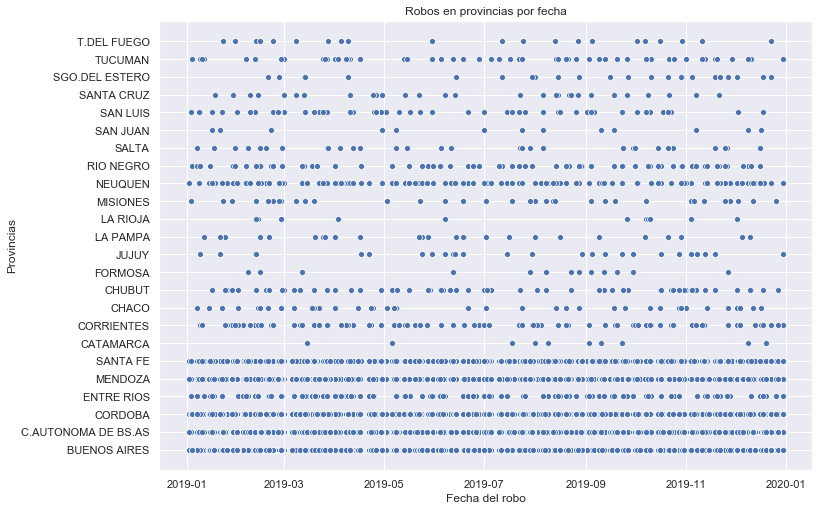

In [109]:
sns.scatterplot(data['tramite_fecha'], data['titular_domicilio_provincia'])
plt.title('Robos en provincias por fecha')
plt.ylabel('Provincias')
plt.xlabel('Fecha del robo')
plt.show()


In [142]:
data.titular_anio_nacimiento.value_counts().head(10)

1982.0    1025
1980.0    1021
1983.0    1006
1978.0    1002
1981.0     990
1979.0     987
1977.0     977
1987.0     972
1986.0     960
1984.0     927
Name: titular_anio_nacimiento, dtype: int64

<font color=blue>Se puede observar que los adultos que oscilan entre los 33 y 36 años son las principales víctimas nacidos en 1982, 1980 y 1983.

<font color= blue>Se observa como en las provincias más pobladas de Argentina, los robos se registran durante todo el año. A diferencia de otras provincias, en donde se puede observar que los robos se intensifican en meses de vacaciones de verano e invierno.

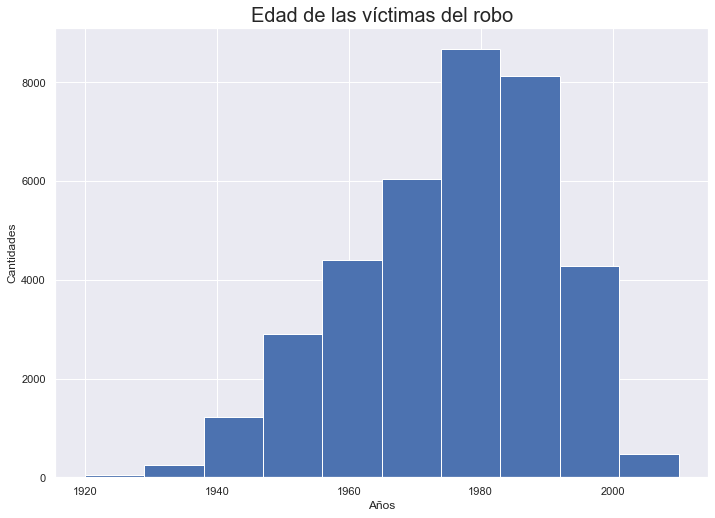

In [125]:
plt.hist(data['titular_anio_nacimiento'], range=(1920, 2010))
plt.title('Edad de las víctimas del robo', fontsize = 20)
plt.xlabel('Años')
plt.ylabel('Cantidades')
plt.show()

### Cantidad de robos por provincia

In [126]:
data['titular_domicilio_provincia'].value_counts()

BUENOS AIRES           24501
C.AUTONOMA DE BS.AS     5876
CORDOBA                 2589
MENDOZA                 1490
SANTA FE                1390
NEUQUEN                  162
ENTRE RIOS               138
CORRIENTES               104
RIO NEGRO                 91
CHUBUT                    71
TUCUMAN                   60
SAN LUIS                  59
CHACO                     41
MISIONES                  40
SALTA                     32
SANTA CRUZ                30
JUJUY                     28
LA PAMPA                  28
SGO.DEL ESTERO            27
T.DEL FUEGO               24
SAN JUAN                  14
FORMOSA                   14
LA RIOJA                  13
CATAMARCA                 11
Name: titular_domicilio_provincia, dtype: int64

In [127]:
data['titular_domicilio_provincia'].value_counts(normalize = True)

BUENOS AIRES           0.665192
C.AUTONOMA DE BS.AS    0.159531
CORDOBA                0.070290
MENDOZA                0.040453
SANTA FE               0.037738
NEUQUEN                0.004398
ENTRE RIOS             0.003747
CORRIENTES             0.002824
RIO NEGRO              0.002471
CHUBUT                 0.001928
TUCUMAN                0.001629
SAN LUIS               0.001602
CHACO                  0.001113
MISIONES               0.001086
SALTA                  0.000869
SANTA CRUZ             0.000814
JUJUY                  0.000760
LA PAMPA               0.000760
SGO.DEL ESTERO         0.000733
T.DEL FUEGO            0.000652
SAN JUAN               0.000380
FORMOSA                0.000380
LA RIOJA               0.000353
CATAMARCA              0.000299
Name: titular_domicilio_provincia, dtype: float64

<font color= blue> Provincia de Buenos Aires representa el 66% de la muestra. <br>El 15% lo tiene CABA mientras que las dos provincias que siguen al estudio son Córdoba y Mendoza. 

In [129]:
data.titular_genero.value_counts()

Masculino          19657
Femenino            8849
No identificado     6415
No aplica           1912
Name: titular_genero, dtype: int64

In [130]:
data.titular_genero.value_counts(normalize = True)

Masculino          0.533679
Femenino           0.240247
No identificado    0.174164
No aplica          0.051910
Name: titular_genero, dtype: float64

<font color = blue> El 53% de las víctimas de robos de vehículos en Argetina son de género masculino

In [133]:
data.titular_porcentaje_titularidad.value_counts(normalize = True).head(10)

100    0.952570
50     0.045367
75     0.000353
70     0.000217
95     0.000163
33     0.000163
25     0.000136
90     0.000136
51     0.000081
65     0.000081
Name: titular_porcentaje_titularidad, dtype: float64

<font color=blue>El 95% de las víctimas tienen el 100% de la titularidad del vehículo. El 4% tenía el 50% de la titularidad del auto

In [135]:
data.titular_tipo_persona.value_counts()

Física      34921
Jurídica     1912
Name: titular_tipo_persona, dtype: int64

In [136]:
data.titular_tipo_persona.value_counts(normalize = True)

Física      0.94809
Jurídica    0.05191
Name: titular_tipo_persona, dtype: float64

<font color= blue> El 94% de los denunciantes son personas físicas. Solo el 5% de los robos fueron denunciados por personas jurídicas